<a href="https://colab.research.google.com/github/Wilma1088/mypackage/blob/master/Zindi_Challenge_V10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR

from tqdm import tqdm
import math
import random

from scipy.stats import norm, skew #for some statistics

from google.colab import files
import io

In [4]:
uploaded = files.upload()

Saving Riders.csv to Riders (2).csv
Saving Test.csv to Test (2).csv
Saving Train.csv to Train (2).csv


In [5]:
riders_df = pd.read_csv(io.BytesIO(uploaded['Riders.csv']))
riders_df.columns= [col.replace(' ', '_') for col in riders_df.columns]
riders_df.head()

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [6]:
test_df = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
test_df.columns= [col.replace(' ', '_') for col in test_df.columns]
test_df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [7]:
train_df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
train_df.columns= [col.replace(' ', '_') for col in train_df.columns]
train_df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [8]:
df=pd.concat([train_df, test_df])
df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9.0,5.0,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12.0,5.0,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30.0,2.0,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15.0,5.0,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13.0,1.0,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


In [9]:
df = df.merge(riders_df, left_on='Rider_Id', right_on='Rider_Id', how='left')

In [10]:
df.shape

(28269, 33)

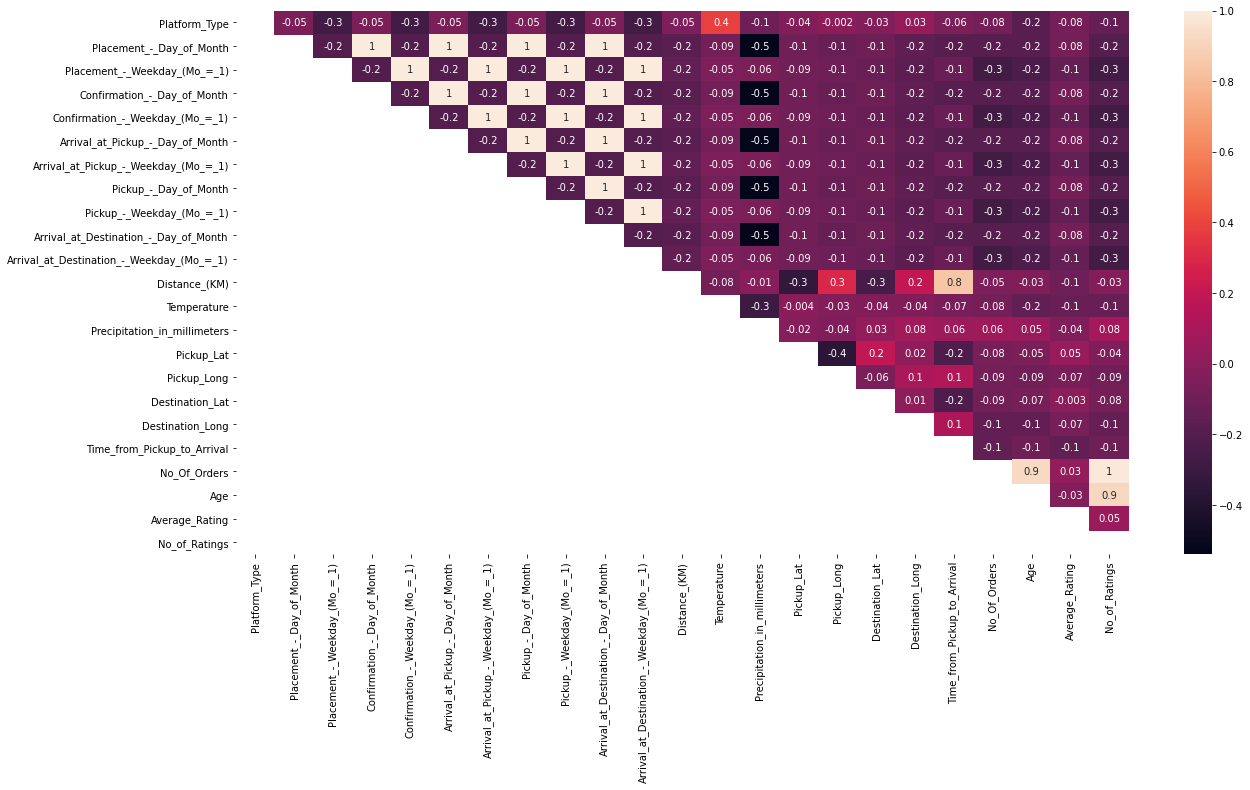

In [11]:
plt.figure(figsize=(20,10))
data = df.corr()
mask = np.tril(data)
sns.heatmap(data.corr(), annot = True, fmt='.1g', mask= mask)

In [13]:
df= df.drop(['Arrival_at_Destination_-_Day_of_Month', 'Arrival_at_Destination_-_Weekday_(Mo_=_1)', 
             'Arrival_at_Destination_-_Time', 'Order_No', 'User_Id', 'Vehicle_Type', 
             'Rider_Id', 'Placement_-_Time','Confirmation_-_Time', 'Arrival_at_Pickup_-_Time', 
             'Pickup_-_Time', 'Destination_Lat','Destination_Long', 'Pickup_Lat', 
             'Pickup_Long', 'Arrival_at_Pickup_-_Day_of_Month', 'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 
             'Confirmation_-_Day_of_Month',	'Confirmation_-_Weekday_(Mo_=_1)', 
             'Placement_-_Day_of_Month', 'Placement_-_Weekday_(Mo_=_1)' ],axis=1) 

In [14]:
df.head()

,Platform_Type,Personal_or_Business,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,4,20.4,NaN,745.0,1637,1309,13.8,549
1,3,Personal,12,5,16,26.4,NaN,1993.0,396,339,13.6,69
2,3,Business,30,2,3,NaN,NaN,455.0,1023,242,12.5,114
3,3,Business,15,5,9,19.2,NaN,1341.0,886,283,14.5,113
4,1,Personal,13,1,9,15.4,NaN,1214.0,2311,872,14.1,533


In [15]:
def scatter_plot(feature, target):
  plt.figure(figsize=(10,5))
  plt.scatter(
      data[feature],
      data[target],
      c='black'
  )
  plt.xlabel("Feature".format(feature))
  plt.show()

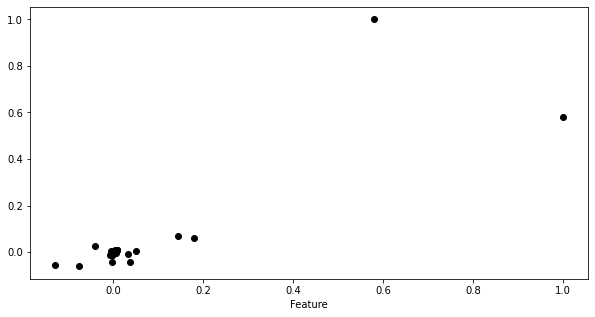

In [16]:
scatter_plot('Distance_(KM)', 'Time_from_Pickup_to_Arrival')

In [17]:
df.isnull().sum()

Platform_Type                       0
Personal_or_Business                0
Pickup_-_Day_of_Month               0
Pickup_-_Weekday_(Mo_=_1)           0
Distance_(KM)                       0
Temperature                      5803
Precipitation_in_millimeters    27518
Time_from_Pickup_to_Arrival      7068
No_Of_Orders                        0
Age                                 0
Average_Rating                      0
No_of_Ratings                       0
dtype: int64

In [18]:
df['Temperature'].fillna((df['Temperature'].mean()), inplace=True)

In [19]:
df['Precipitation_in_millimeters'].fillna((df['Precipitation_in_millimeters'].mean()), inplace=True)

In [20]:
df["Personal_or_Business"] = pd.get_dummies(df["Personal_or_Business"],prefix='Personal_or_Business',drop_first=True)

In [21]:
df.head()

,Platform_Type,Personal_or_Business,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,0,9,5,4,20.400000,7.573502,745.0,1637,1309,13.8,549
1,3,1,12,5,16,26.400000,7.573502,1993.0,396,339,13.6,69
2,3,0,30,2,3,23.255689,7.573502,455.0,1023,242,12.5,114
3,3,0,15,5,9,19.200000,7.573502,1341.0,886,283,14.5,113
4,1,1,13,1,9,15.400000,7.573502,1214.0,2311,872,14.1,533


In [22]:
# train test split
y = df[:len(train_df)][['Time_from_Pickup_to_Arrival']]
x_train = df[:len(train_df)].drop('Time_from_Pickup_to_Arrival',axis=1)
x_test = df[len(train_df):].drop('Time_from_Pickup_to_Arrival',axis=1)
x = df[:len(train_df)].drop('Time_from_Pickup_to_Arrival',axis=1)

# **Modelling**

K-fold

Random Forest Regression

In [23]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [24]:
x_train, x_test, y_train,y_test = train_test_split(x_sc,y,test_size=0.2,random_state= 42)

In [25]:
regressor = RandomForestRegressor(n_estimators= 120, random_state= 42)
####try different models on different versions

In [26]:
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [27]:
y_predict = regressor.predict(x_test)

In [28]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [29]:
rmse(y_test, y_predict)

810.9530033431475

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, y_predict) 

0.32293005114480666

Linear Regression

In [32]:
lr = LinearRegression()
####try different models on different versions, go wild! to see results

In [33]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [34]:
lr.fit(x_train,y_train)

preds = lr.predict(x_test)

In [35]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [36]:
rmse(y_test, preds)

800.5254232508801

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, preds) 
### checking for accuracy

0.3402302141630247

Ridge Regression

In [39]:
rdg = Ridge(alpha=1.0)

In [40]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [41]:
rdg.fit(x_train,y_train)

preds = rdg.predict(x_test)

In [42]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [43]:
rmse(y_test, preds)

800.5257382287992

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test, preds) 
### checking for accuracy

0.3402296949716308

Lasso Regression

In [46]:
ls = Lasso()

In [47]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [48]:
ls.fit(x_train,y_train)

preds = ls.predict(x_test)

In [49]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [50]:
rmse(y_test, preds)

800.7540264954907

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test, preds) 
### checking for accuracy

0.3398533440606788

Decision Tree Regression

In [53]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [54]:
dtr = DecisionTreeRegressor(random_state=42)

In [55]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [56]:
dtr.fit(x_train, y_train)

preds = dtr.predict(x_test)

In [57]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [58]:
rmse(y_test, preds)

1116.6182697817014

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test, preds) 
### checking for accuracy

-0.28366477560894965

Polynomial Regression

In [61]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pol_reg.predict(poly_reg.fit_transform(x_test))

array([[1862.1452187 ],
       [1861.43935322],
       [ 484.61289869],
       ...,
       [1135.55542063],
       [1965.2040714 ],
       [1016.13518111]])

In [63]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [64]:
rmse(y_test, preds)

1116.6182697817014

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test, preds) 
### checking for accuracy

-0.28366477560894965

Logistic Regression

In [67]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
preds = log_reg.predict(x_test)

In [ ]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
rmse(y_test, preds)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, preds) 
### checking for accuracy

Support Vector Regression

In [ ]:
sc = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [ ]:
sr = SVR(kernel='rbf')
####try different models on different versions

In [ ]:
sr.fit(x_train, y_train)

In [ ]:
y_predict = sr.predict(x_test)

In [ ]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
rmse(y_test, y_predict)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_predict) 